`Import Library`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


`Read Data`

In [3]:
data_train = pd.read_csv('/content/drive/MyDrive/project/PORTODATA/House_Price/train.csv')
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


`check missing value dalam data dan tipe data`

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# `Data Cleaning`

*kalkulasi persentase missing value tiap variabel*

**hapus variabel jika missing value mendekati atau lebih dari 50%**

In [5]:
(data_train.isna().sum()* 100 / len(data_train)).sort_values(ascending=False).head(10)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
dtype: float64

In [6]:
#filter data dari persentase missing value
data_train = data_train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)

***visualisasi data untuk melihat pola penyebaran data***

`jika data menjauhi bentuk skew isi dengan median`

`jika data mendekati bentuk skew isi dengan rata-rata`

`jika data tidak sama sekali membentuk skew isi dengan modus`

In [7]:
#numerikal data
data_train1 = data_train.select_dtypes(exclude='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

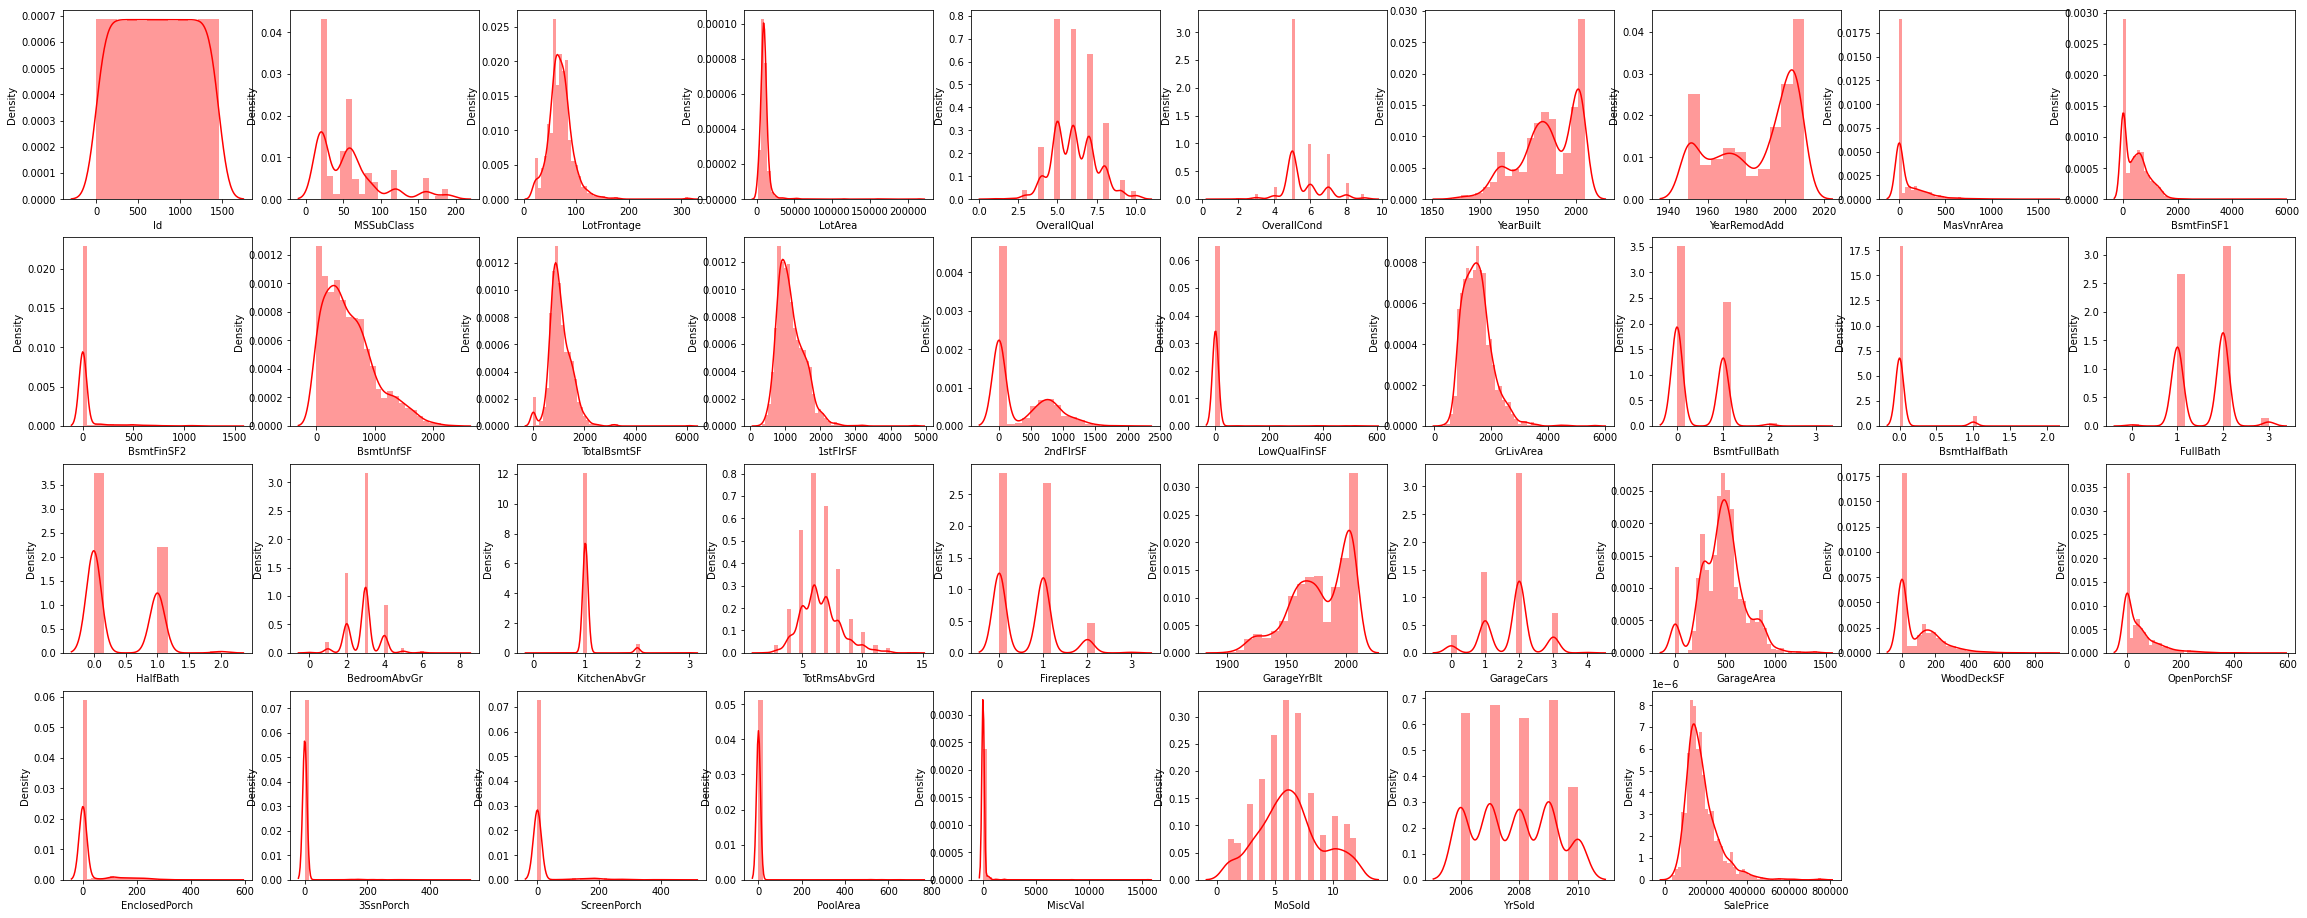

In [8]:
col = data_train1.columns

plt.figure(figsize=(40,16))
for i in range(0,len(col)):
  plt.subplot(4,10,i+1)
  sns.distplot(data_train1[data_train1.columns[i]],color='red')
  plt.tight_layout

In [9]:
# melihat kolom yang terdapat missing value
data_train1.columns[data_train1.isna().any()].to_list()

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

`Imputing missing value variabel numerik`

In [10]:
data_train1['LotFrontage'].fillna(data_train1['LotFrontage'].mean(), inplace = True)

mediantreat = ['GarageYrBlt', 'MasVnrArea']
for j in mediantreat:
  data_train1.loc[data_train1.loc[:,j].isnull(),j] = data_train1.loc[:,j].median()

data_train1.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

*visualisasi setelah impute missing value*

Text(0.5, 0, '')

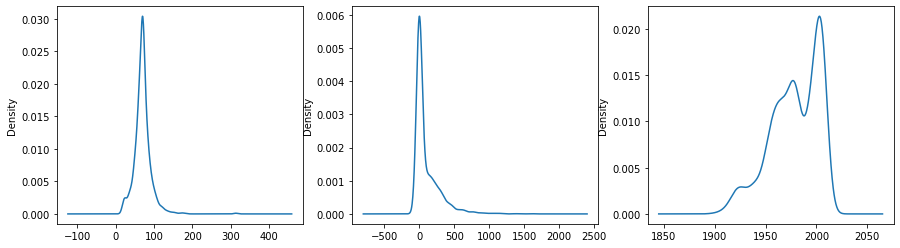

In [11]:
plt.figure(figsize=(15,4))

ax = plt.subplot(131)
data_train1['LotFrontage'].plot(kind="kde",ax=ax)
plt.xticks(rotation='0')
plt.xlabel(None)

ax = plt.subplot(132)
data_train1['MasVnrArea'].plot(kind="kde",ax=ax)
plt.xticks(rotation='0')
plt.xlabel(None)

ax = plt.subplot(133)
data_train1['GarageYrBlt'].plot(kind="kde",ax=ax)
plt.xticks(rotation='0')
plt.xlabel(None)

***visualisasi data untuk melihat pola perbandingan class data***

`data yang kosong isi dengan nilai modus`

In [12]:
data_train2 = data_train.select_dtypes(include='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

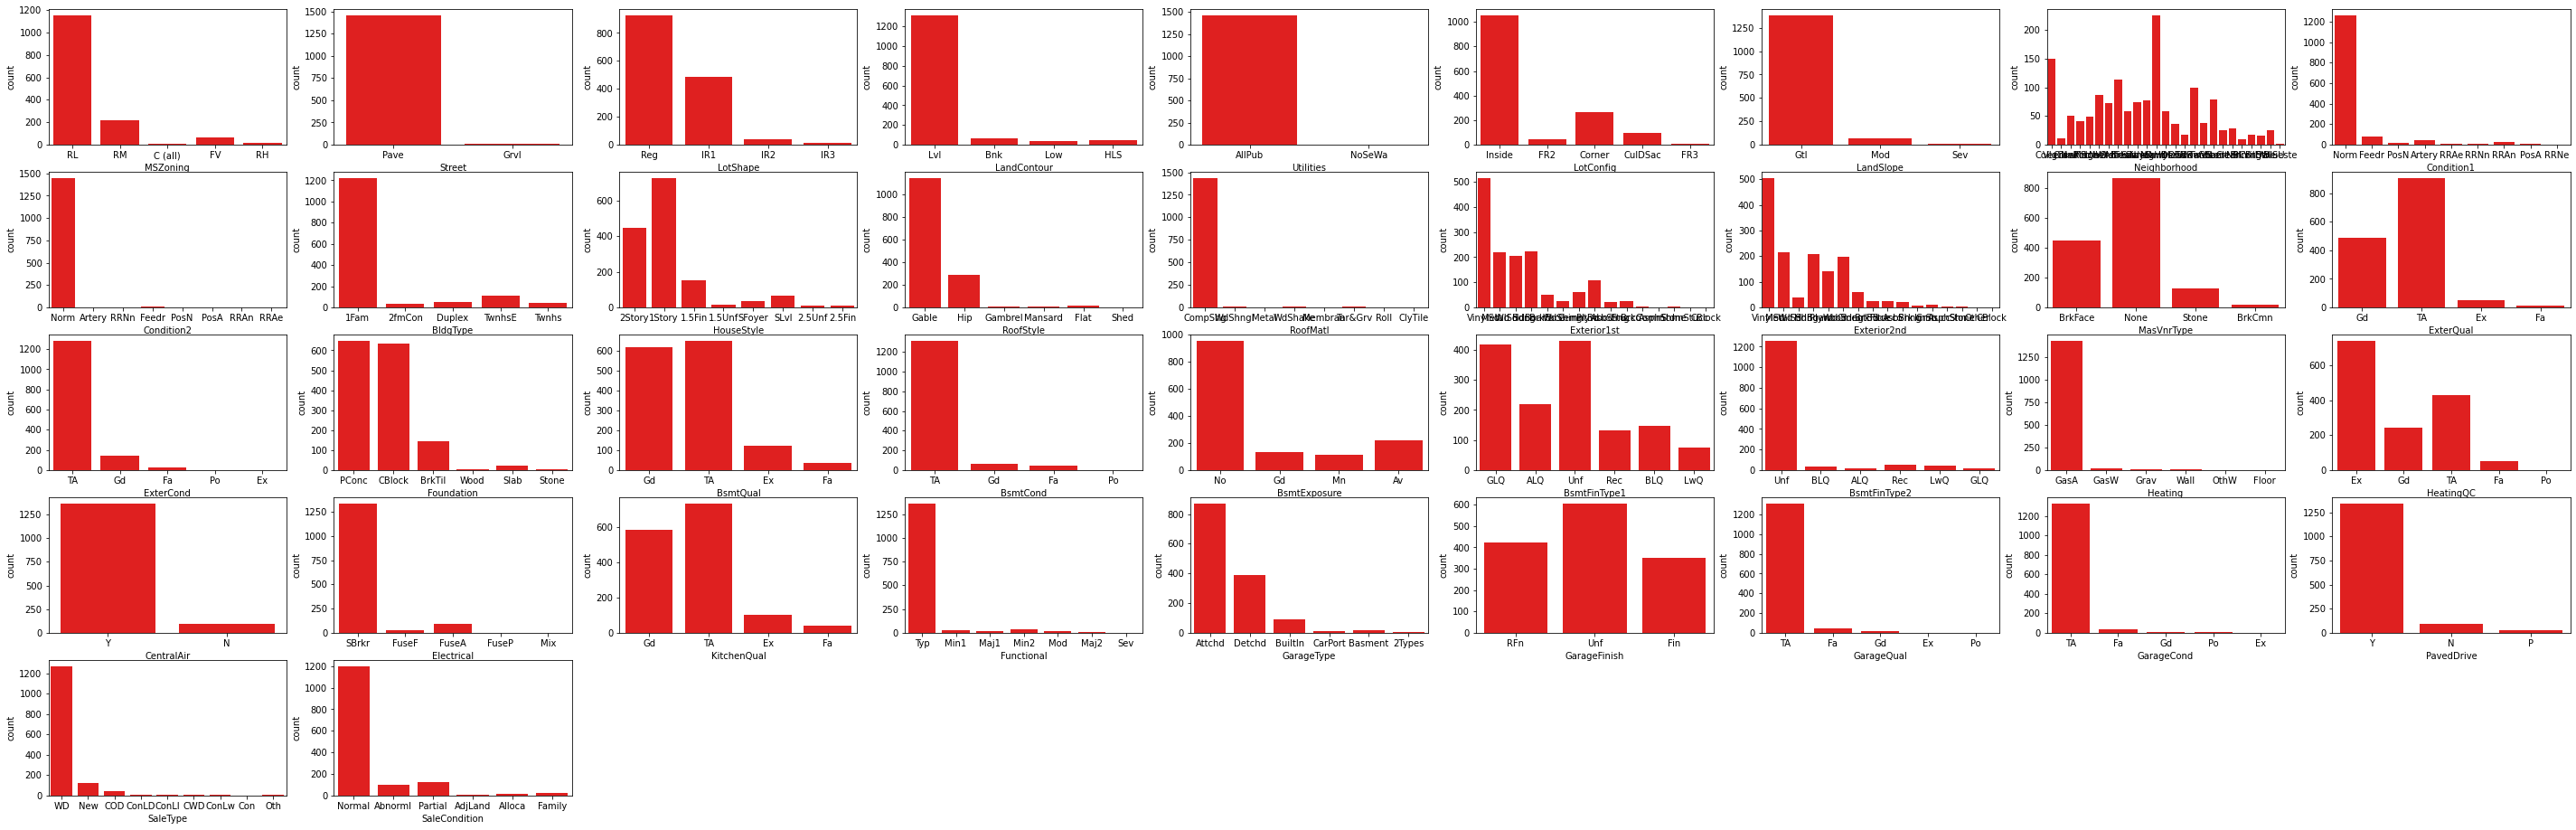

In [162]:
col = data_train2.columns

plt.figure(figsize=(50,16))
for i in range(0,len(col)):
  plt.subplot(5,9,i+1)
  sns.countplot(data_train2[data_train2.columns[i]],color='red')
  plt.tight_layout

In [13]:
data_train2.columns[data_train2.isna().any()].to_list()

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

`Imputing missing value variabel kategori`

In [14]:
modetreat = data_train2.columns[data_train2.isna().any()].to_list()

for i in modetreat:
  data_train2.loc[data_train2.loc[:,i].isna(),i] = data_train2.loc[:,i].mode()[0]

data_train2.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [20]:
for col in data_train2.columns:
  print('jlh label kelas',col,':',data_train2[col].nunique())

jlh label kelas MSZoning : 5
jlh label kelas Street : 2
jlh label kelas LotShape : 4
jlh label kelas LandContour : 4
jlh label kelas Utilities : 2
jlh label kelas LotConfig : 5
jlh label kelas LandSlope : 3
jlh label kelas Neighborhood : 25
jlh label kelas Condition1 : 9
jlh label kelas Condition2 : 8
jlh label kelas BldgType : 5
jlh label kelas HouseStyle : 8
jlh label kelas RoofStyle : 6
jlh label kelas RoofMatl : 8
jlh label kelas Exterior1st : 15
jlh label kelas Exterior2nd : 16
jlh label kelas MasVnrType : 4
jlh label kelas ExterQual : 4
jlh label kelas ExterCond : 5
jlh label kelas Foundation : 6
jlh label kelas BsmtQual : 4
jlh label kelas BsmtCond : 4
jlh label kelas BsmtExposure : 4
jlh label kelas BsmtFinType1 : 6
jlh label kelas BsmtFinType2 : 6
jlh label kelas Heating : 6
jlh label kelas HeatingQC : 5
jlh label kelas CentralAir : 2
jlh label kelas Electrical : 5
jlh label kelas KitchenQual : 4
jlh label kelas Functional : 7
jlh label kelas GarageType : 6
jlh label kelas Gar

In [21]:
#filter data dari jumlah kelas label variabel
data_train2 = data_train2.drop(['Neighborhood','Exterior1st','Exterior2nd'],axis=1)

# `EDA`

In [22]:
korelasi = data_train1.corr().abs()
korelasi

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,0.009601,0.033226,0.028365,0.012609,0.012713,0.021998,0.051071,0.005024,...,0.029643,0.000477,0.002889,0.046635,0.001330,0.057044,0.006242,0.021172,0.000712,0.021917
MSSubClass,0.011156,1.000000,0.357056,0.139781,0.032628,0.059316,0.027850,0.040581,0.023573,0.069836,...,0.012579,0.006100,0.012037,0.043825,0.026030,0.008283,0.007683,0.013585,0.021407,0.084284
LotFrontage,0.009601,0.357056,1.000000,0.306795,0.234196,0.052820,0.117598,0.082746,0.178699,0.215828,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,0.033226,0.139781,0.306795,1.000000,0.105806,0.005636,0.014228,0.013788,0.103321,0.214103,...,0.171698,0.084774,0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.014261,0.263843
OverallQual,0.028365,0.032628,0.234196,0.105806,1.000000,0.091932,0.572323,0.550684,0.407252,0.239666,...,0.238923,0.308819,0.113937,0.030371,0.064886,0.065166,0.031406,0.070815,0.027347,0.790982
OverallCond,0.012609,0.059316,0.052820,0.005636,0.091932,1.000000,0.375983,0.073741,0.125694,0.046231,...,0.003334,0.032589,0.070356,0.025504,0.054811,0.001985,0.068777,0.003511,0.043950,0.077856
YearBuilt,0.012713,0.027850,0.117598,0.014228,0.572323,0.375983,1.000000,0.592855,0.311600,0.249503,...,0.224880,0.188686,0.387268,0.031355,0.050364,0.004950,0.034383,0.012398,0.013618,0.522897
YearRemodAdd,0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.205726,0.226298,0.193919,0.045286,0.038740,0.005829,0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.051071,0.023573,0.178699,0.103321,0.407252,0.125694,0.311600,0.176529,1.000000,0.261256,...,0.159991,0.122528,0.109907,0.019144,0.062248,0.011928,0.029512,0.006723,0.008317,0.472614
BsmtFinSF1,0.005024,0.069836,0.215828,0.214103,0.239666,0.046231,0.249503,0.128451,0.261256,1.000000,...,0.204306,0.111761,0.102303,0.026451,0.062021,0.140491,0.003571,0.015727,0.014359,0.386420


In [23]:
upperslice = korelasi.where(np.triu(np.ones(korelasi.shape),k=1).astype(np.bool))
print(upperslice)

               Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id            NaN    0.011156     0.009601  0.033226     0.028365   
MSSubClass    NaN         NaN     0.357056  0.139781     0.032628   
LotFrontage   NaN         NaN          NaN  0.306795     0.234196   
LotArea       NaN         NaN          NaN       NaN     0.105806   
OverallQual   NaN         NaN          NaN       NaN          NaN   
OverallCond   NaN         NaN          NaN       NaN          NaN   
YearBuilt     NaN         NaN          NaN       NaN          NaN   
YearRemodAdd  NaN         NaN          NaN       NaN          NaN   
MasVnrArea    NaN         NaN          NaN       NaN          NaN   
BsmtFinSF1    NaN         NaN          NaN       NaN          NaN   
BsmtFinSF2    NaN         NaN          NaN       NaN          NaN   
BsmtUnfSF     NaN         NaN          NaN       NaN          NaN   
TotalBsmtSF   NaN         NaN          NaN       NaN          NaN   
1stFlrSF      NaN         NaN     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


`check multikolinearitas variabel prediktor`

In [24]:
drop = [column for column in upperslice.columns if any(upperslice[column] >= 0.5)]
print(drop)

['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [25]:
drop = drop[:-1]
drop

['YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

`menghapus variabel yang terdapat multikolinearitas`

In [26]:
data_train1.drop(columns=drop,axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
data_train1.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

`check outlier variabel prediktor`

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

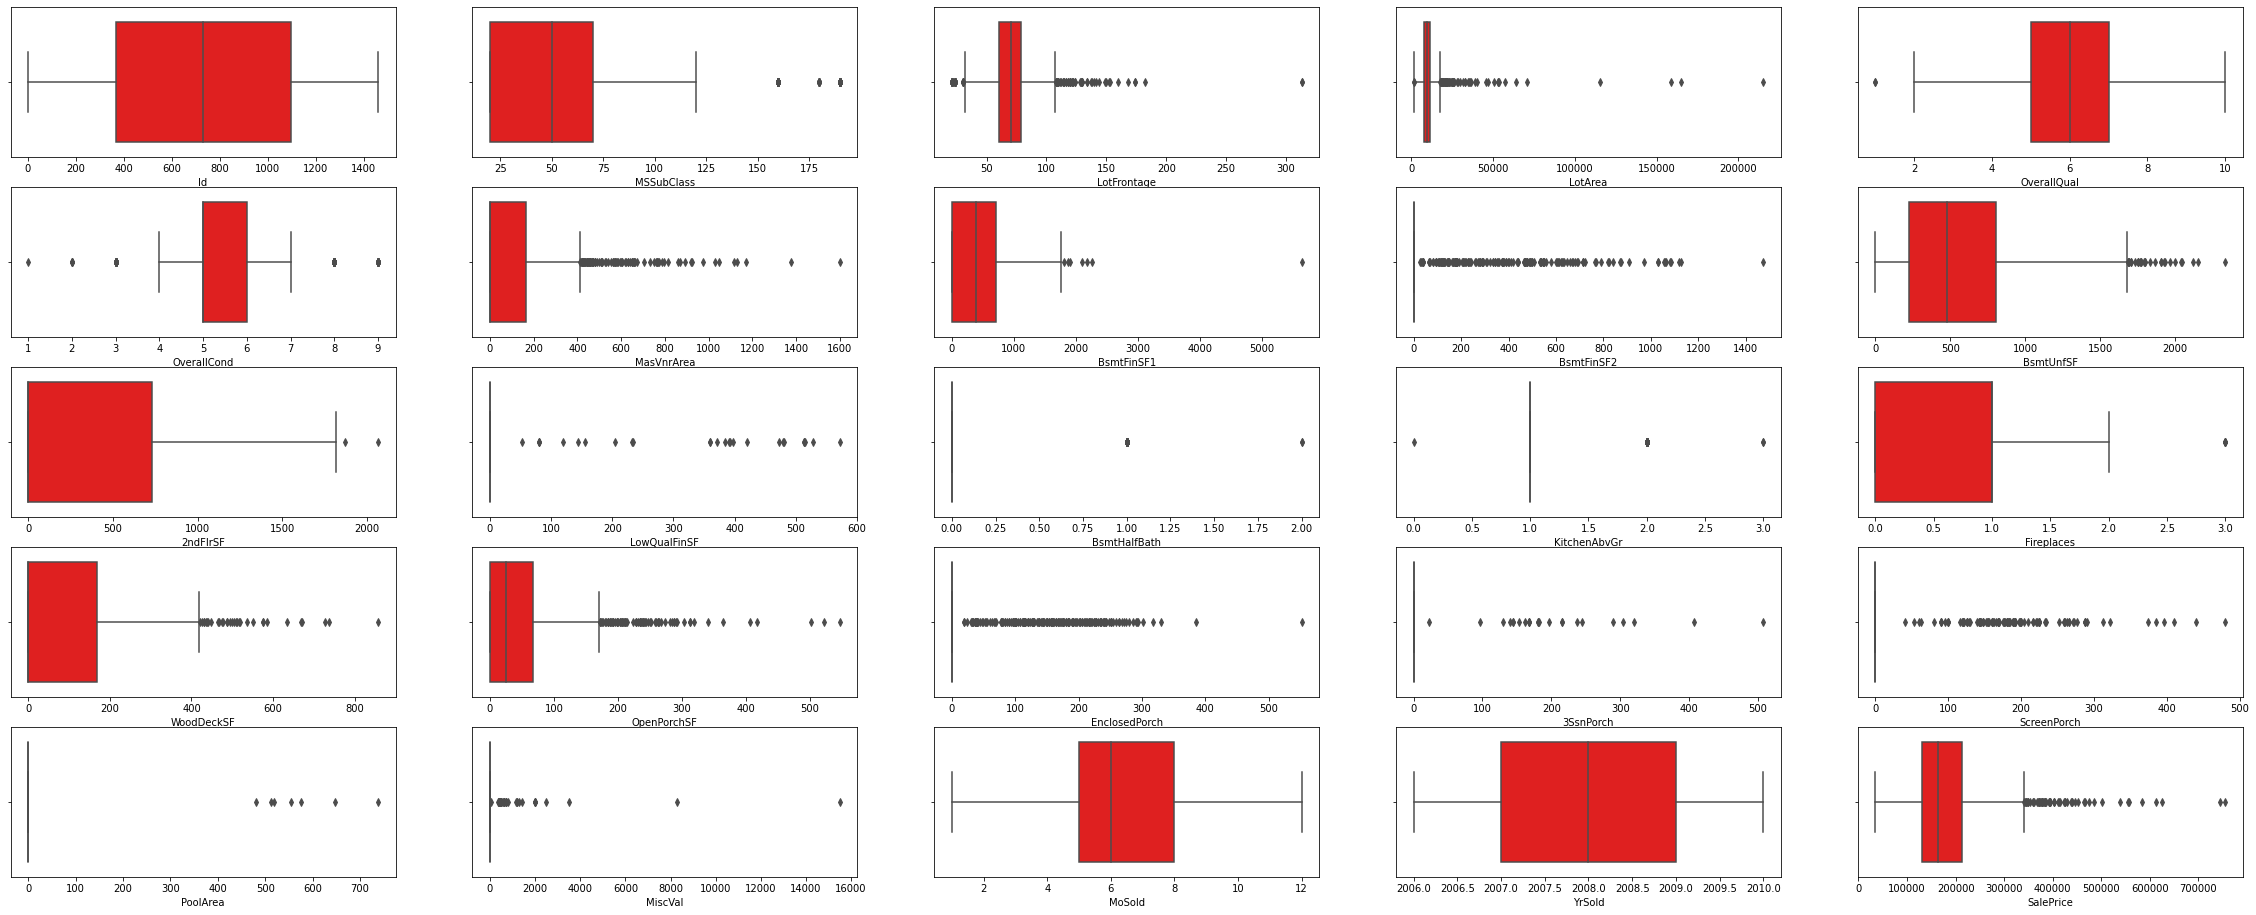

In [172]:
col = data_train1.columns

plt.figure(figsize=(40,16))
for i in range(0,len(col)):
  plt.subplot(5,5,i+1)
  sns.boxplot(data_train1[data_train1.columns[i]],color='red')
  plt.tight_layout

In [28]:
#menghapus variabel ID
data_train1.drop(['Id'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# `Data Preprocessing`

`Transformasi Robust `

In [29]:
from sklearn.preprocessing import RobustScaler

col = data_train1.columns
robust_scale = RobustScaler()
robust = robust_scale.fit_transform(data_train1)
data_train1 = pd.DataFrame(robust, columns = col)

`One Hot Encoding`

In [30]:
from sklearn.preprocessing import OneHotEncoder

data_train2 = pd.get_dummies(data_train2)

`menggabungkan variabel numerik dan variabel kategorik`

In [64]:
dataset = pd.concat([data_train1,data_train2],axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 202 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(24), uint8(178)
memory usage: 527.7 KB


`menentukan variabel prediktor dan variabel target`

In [33]:
X = dataset.drop(['SalePrice'],axis=1)
y = dataset['SalePrice']

`split data train dan data test untuk modelling`

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

# Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

reg = LinearRegression()
reg.fit(X_train,y_train)
print('reg score R2 :',format(reg.score(X_test,y_test)))

y_pred = reg.predict(X_test)
print('Multiple Linear MAE',metrics.mean_absolute_error(y_test,y_pred))

reg score R2 : 0.8476201816017247
Multiple Linear MAE 0.23732744300106773


# Ridge Regression

In [36]:
from sklearn.linear_model import Ridge
from sklearn import metrics

ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)
print('Ridge score R2 :',format(ridge.score(X_test,y_test)))

y_pred = ridge.predict(X_test)
print('Ridge MAE',metrics.mean_absolute_error(y_test,y_pred))

Ridge score R2 : 0.8607530108368504
Ridge MAE 0.2313912875374701


#`Lasso Regression`

In [37]:
from sklearn.linear_model import Lasso
from sklearn import metrics

lasso = Lasso(alpha=1e-3)
lasso.fit(X_train,y_train)
print('Lasso score R2 :',format(lasso.score(X_test,y_test)))

y_pred = lasso.predict(X_test)
print('Lasso MAE',metrics.mean_absolute_error(y_test,y_pred))

Lasso score R2 : 0.8730661485828026
Lasso MAE 0.21929114412373302


# Support Vector Regression

In [38]:
from sklearn.svm import SVR
from sklearn import metrics

svr = SVR(kernel= 'rbf')
svr.fit(X_train,y_train)
print('Lasso score R2 :',format(svr.score(X_test,y_test)))

y_pred = svr.predict(X_test)
print('Lasso MAE',metrics.mean_absolute_error(y_test,y_pred))

Lasso score R2 : 0.006221750552227179
Lasso MAE 0.6162124907972519


# XGBoost Regression

In [39]:
import xgboost
from sklearn import metrics

xgb = xgboost.XGBRegressor()
xgb.fit(X_train,y_train)
print('XGB score R2 :',format(xgb.score(X_test,y_test)))

y_pred = xgb.predict(X_test)
print('XGB MAE',metrics.mean_absolute_error(y_test,y_pred))

[14:20:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB score R2 : 0.8609698432187525
XGB MAE 0.22285309390092944


# Decision Tree Regression

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

for i in range(1,50):
  decisiontree = DecisionTreeRegressor(random_state= i)
  decisiontree.fit(X_train,y_train)
  R2 = decisiontree.score(X_test,y_test)

  y_pred = decisiontree.predict(X_test)
  MAE = (metrics.mean_absolute_error(y_test,y_pred))

  if R2 > 0.7:
    print('R2 DT random state',i,':',R2,'MAE :',MAE)
  else:
    None

R2 DT random state 2 : 0.7171509978578303 MAE : 0.32857097053361217
R2 DT random state 18 : 0.7136094086253875 MAE : 0.3337716949320638
R2 DT random state 30 : 0.7009534755985196 MAE : 0.3363127684057936
R2 DT random state 31 : 0.7039188755472839 MAE : 0.33802608214830604
R2 DT random state 34 : 0.7087063928028337 MAE : 0.33340023014459447
R2 DT random state 37 : 0.7118767212960834 MAE : 0.33218796319316796
R2 DT random state 39 : 0.7036909483693593 MAE : 0.34499536042627016
R2 DT random state 40 : 0.7190942508734383 MAE : 0.329701939654294
R2 DT random state 43 : 0.7181154668661529 MAE : 0.327452826471791
R2 DT random state 44 : 0.7179716496509378 MAE : 0.3366749676316709
R2 DT random state 47 : 0.7080133156399899 MAE : 0.3342098663286503


# Random Forest Regression

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

randomforest = RandomForestRegressor(n_estimators = 1000, random_state=50)
randomforest.fit(X_train,y_train)
print('RF score R2 :',format(randomforest.score(X_test,y_test)))

y_pred = randomforest.predict(X_test)
print('RF MAE',metrics.mean_absolute_error(y_test,y_pred))

RF score R2 : 0.8396259491509427
RF MAE 0.23569313454492094


memodifikasi random state untuk mendapatkan RSquare diatas 0.87

In [186]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

for i in range(10,60):
  randomforest = RandomForestRegressor(n_estimators = 1000, random_state=i)
  randomforest.fit(X_train,y_train)
  R2 = randomforest.score(X_test,y_test)

  y_pred = randomforest.predict(X_test)
  MAE = (metrics.mean_absolute_error(y_test,y_pred))

  if R2 > 0.87:
    print('R2 RF random state',i,':',R2,'MAE :',MAE)
  else:
    None

`tidak ditemukan RSquare dari random forest yang diatas 0.87`

# Bagging Regression

In [42]:
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

bagging = BaggingRegressor(n_estimators=1000, random_state=50)
bagging.fit(X_train,y_train)
print('Bagging score R2 :',format(bagging.score(X_test,y_test)))

y_pred = bagging.predict(X_test)
print('Bagging MAE',metrics.mean_absolute_error(y_test,y_pred))

Bagging score R2 : 0.8400239578402622
Bagging MAE 0.23513233322328767


memodifikasi random state untuk mendapatkan RSquare diatas 0.87

In [188]:
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

for i in range(10,60):
  bagging = BaggingRegressor(n_estimators=1000, random_state=i)
  bagging.fit(X_train,y_train)
  R2 = bagging.score(X_test,y_test)

  y_pred = bagging.predict(X_test)
  MAE = (metrics.mean_absolute_error(y_test,y_pred))

  if R2 > 0.87:
    print('R2 Bagging random state',i,':',R2,'MAE :',MAE)
  else:
    None

`tidak ditemukan RSquare dari bagging yang diatas 0.87`

# Gradient Boosting Regression

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, loss='ls', random_state=50)
gbr.fit(X_train,y_train)
print('Gradient Boosting score R2 :',format(gbr.score(X_test,y_test)))

y_pred = gbr.predict(X_test)
print('Bagging MAE',metrics.mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


Gradient Boosting score R2 : 0.8625315731880486
Bagging MAE 0.21952121648817818


memodifikasi random state untuk mendapatkan RSquare diatas 0.87

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

for i in range(10,60):
  gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, loss='ls', random_state=i)
  gbr.fit(X_train,y_train)
  R2 = gbr.score(X_test,y_test)

  y_pred = gbr.predict(X_test)
  MAE = (metrics.mean_absolute_error(y_test,y_pred))

  if R2 > 0.87:
    print('R2 Gradient Boosting random state',i,':',R2,'MAE :',MAE)
  else:
    None

`tidak ditemukan RSquare dari bagging yang diatas 0.87`

# `Kesimpulan`

**KESIMPULAN : LASSO REGRESSION MEMILIKI AKURASI PALING TINGGI**

In [115]:
from sklearn.linear_model import Lasso
from sklearn import metrics

lasso = Lasso(alpha=1e-3)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
error = y_pred - y_test

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


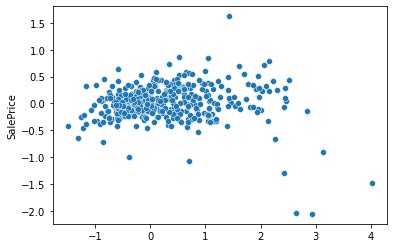

In [116]:
sns.scatterplot(y_pred,error)

`terbukti tidak terjadi heteroskedastisitas`

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


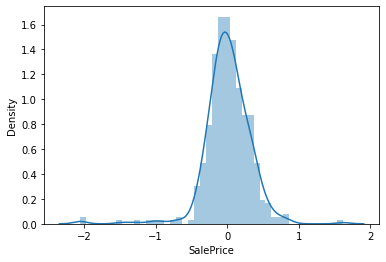

In [117]:
sns.distplot(error)

`terbukti bahwa error berdistribusi normal`



---



# Prediksi Data

In [83]:
data_test = pd.read_csv('/content/drive/MyDrive/project/PORTODATA/House_Price/test.csv')
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [84]:
#filter data test dari persentase missing value data_train
data_test = data_test.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)

In [85]:
#filter data test dari variabel multikolinearitas
data_test.drop(columns=drop,axis=1,inplace=True)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  RoofStyle      1459 non-null   object 
 18  RoofMatl

In [86]:
#numerikal data
data_test1 = data_test.select_dtypes(exclude='object')

#kategorikal data
data_test2 = data_test.select_dtypes(include='object')

In [87]:
# melihat kolom data test numerik yang terdapat missing value
data_test1.columns[data_test1.isna().any()].to_list()

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'BsmtHalfBath']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

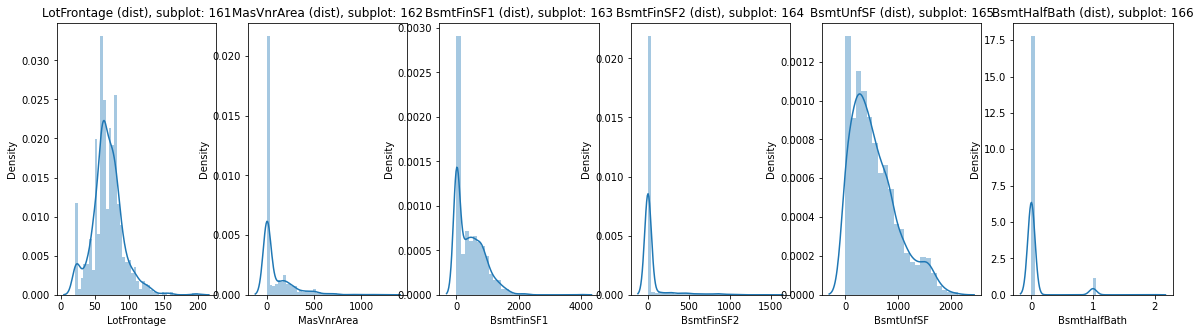

In [91]:
col = data_test1.columns[data_test1.isna().any()].to_list()

a = 1
b = 6
c = 1

fig = plt.figure(figsize=(20,5))
for i in col:
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(data_test1[i])
    c = c + 1

plt.show()

In [92]:
mediantreat = ['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtUnfSF']
for j in mediantreat:
  data_test1.loc[data_test1.loc[:,j].isnull(),j] = data_test1.loc[:,j].median()

modetreat = ['BsmtHalfBath','BsmtFinSF2']
for j in modetreat:
  data_test1.loc[data_test1.loc[:,j].isnull(),j] = data_test1.loc[:,j].mode()[0]

data_test1.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
2ndFlrSF         0
LowQualFinSF     0
BsmtHalfBath     0
KitchenAbvGr     0
Fireplaces       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [93]:
data_test2.columns[data_test2.isna().any()].to_list()

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [94]:
modetreat = data_test2.columns[data_test2.isna().any()].to_list()

for i in modetreat:
  data_test2.loc[data_test2.loc[:,i].isna(),i] = data_test2.loc[:,i].mode()[0]

data_test2.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [95]:
#filter data dari jumlah kelas label variabel
data_test2 = data_test2.drop(['Neighborhood','Exterior1st','Exterior2nd'],axis=1)

In [96]:
from sklearn.preprocessing import RobustScaler

col = data_test1.columns
robust_scale = RobustScaler()
robust = robust_scale.fit_transform(data_test1)
data_test1 = pd.DataFrame(robust, columns = col)

In [97]:
from sklearn.preprocessing import OneHotEncoder

data_test2 = pd.get_dummies(data_test2)

In [98]:
datatest = pd.concat([data_test1,data_test2],axis=1)
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 188 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(23), uint8(165)
memory usage: 497.4 KB


In [104]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 202 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(24), uint8(178)
memory usage: 527.7 KB


terdapat perbedaan jumlah variabel data test dan variabel data train

In [106]:
len(data_train1.columns) #terdapat sale price

24

In [107]:
len(data_test1.columns) #tidak terdapat sale price

23

`maka terdapat perbedaan kelas data dalam variabel kategori`

In [108]:
len(data_train2.columns)

178

In [109]:
len(data_test2.columns)

165